In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
dt=0.001
A=5
k=1
m=1
f=1;
t=np.arange(0, 100, dt)

In [41]:
def plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name):
    
    plt.plot(t_plot, x_plot, '-b', t_plot, vx_plot, '-r', t_plot, ax_plot, '-g', linewidth = 1)
    plt.ylabel('x(t), y(t), a(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: x(t), v(t), a(t)", fontsize = '16')
    plt.ylim(-10, 10)
    plt.xlim(0, 25)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(t)', 'v(t)', 'a(t)'])
    plt.show()

# ------------------------------------------------------  
    
def plot_phase_space(vx_plot, x_plot, algorithm_name):

    plt.plot(vx_plot, x_plot, '-b', linewidth = 1)
    plt.title(f"{algorithm_name}: x(v)", fontsize = '16')
    plt.ylabel('v(t)', fontsize = '14')
    plt.xlabel('x(t)', fontsize = '14')

    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(v)'])
    #plt.gca().set_aspect('equal')
    plt.show()

# ------------------------------------------------------

def plot_total_energy(t_plot, E_plot, algorithm_name):
    
    plt.plot(t_plot, E_plot, '-b', linewidth = 1)
    plt.ylabel('E(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: Total Energy", fontsize = '16')
    #plt.ylim(12.45, 12.55)
    plt.xlim(0, 100)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['E(t)'])
    plt.show()

In [43]:
def acc_ho(position):
    k = 1
    m = 1
    acc = -(k/m)*position
    return acc

In [45]:
def acc_dho(position, velocity):
    k = 1
    m = 1
    b=0.1
    acc = -(k/m)*position - b*velocity
    return acc

# HO

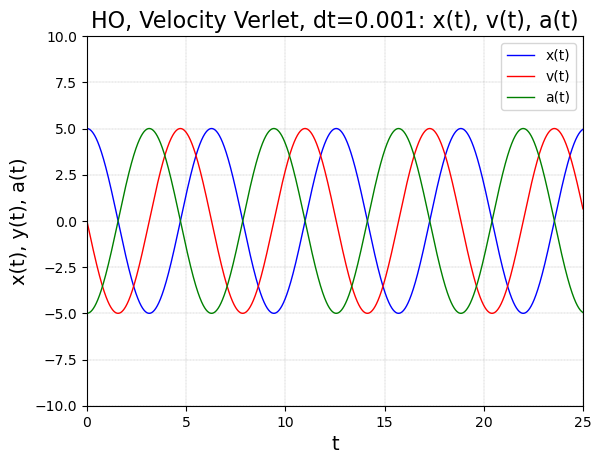

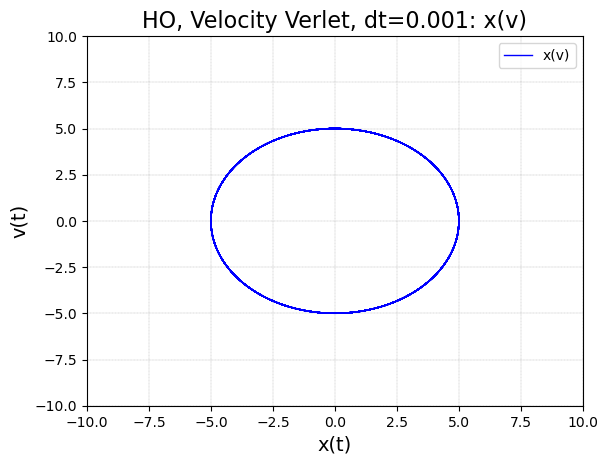

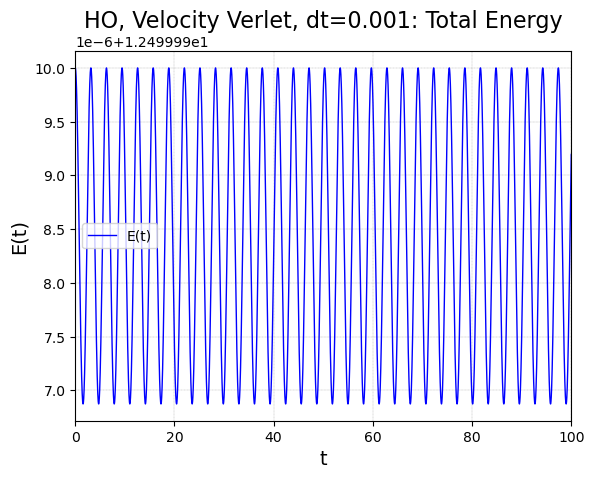

In [46]:
x_vel = []
x_vel.append(A);

vx_vel = []
vx_vel.append(0)

ax_vel = []
ax_vel.append(acc_ho(x_vel[0]));

for i in range(1, len(t)):
    x_vel.append(x_vel[i-1]+dt*vx_vel[i-1]+0.5*dt*dt*ax_vel[i-1])
    ax_vel.append(acc_ho(x_vel[i]))
    vx_vel.append(vx_vel[i-1]+0.5*dt*(ax_vel[i-1]+ax_vel[i]))

EK_vel = []
EP_vel = []
EC_vel = []
EI_vel = []

for i in range(len(t)):
    EK_vel.append(0.5*m*vx_vel[i]**2)
    EP_vel.append(0.5*k*(x_vel[i]**2))
    EC_vel.append(EK_vel[i]+EP_vel[i])
    EI_vel.append(EC_vel[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_vel, EC_vel), 2)))

t_plot = t.copy()
x_plot = x_vel.copy()
vx_plot = vx_vel.copy()
ax_plot = ax_vel.copy()
E_plot = EC_vel.copy()

algorithm_name = f"HO, Velocity Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)

# DHO

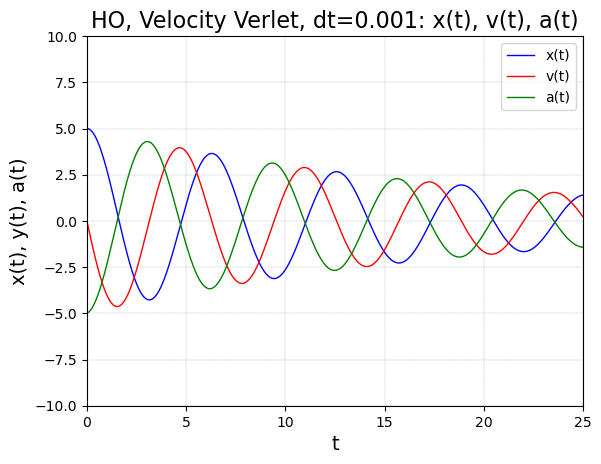

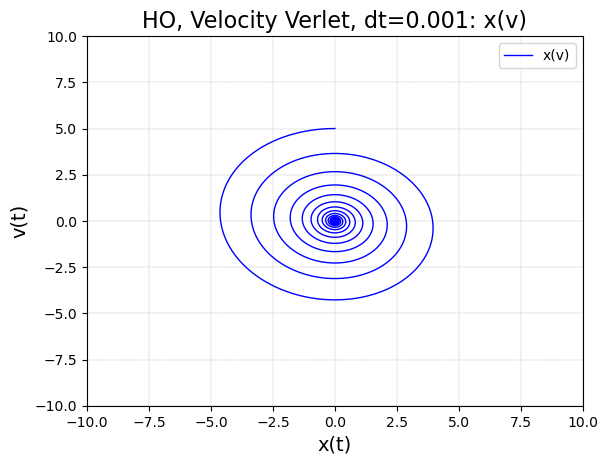

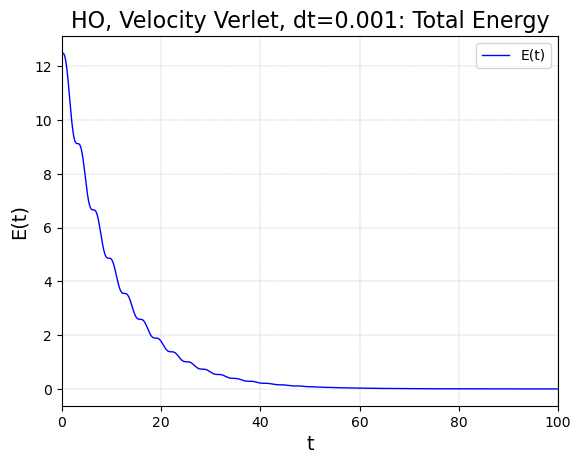

In [49]:
x_vel = []
x_vel.append(A);

vx_vel = []
vx_vel.append(0)

ax_vel = []
ax_vel.append(acc_dho(x_vel[0], vx_vel[0]));

for i in range(1, len(t)):
    x_vel.append(x_vel[i-1]+dt*vx_vel[i-1]+0.5*dt*dt*ax_vel[i-1])
    ax_vel.append(acc_dho(x_vel[i], vx_vel[i-1]))
    vx_vel.append(vx_vel[i-1]+0.5*dt*(ax_vel[i-1]+ax_vel[i]))

EK_vel = []
EP_vel = []
EC_vel = []
EI_vel = []

for i in range(len(t)):
    EK_vel.append(0.5*m*vx_vel[i]**2)
    EP_vel.append(0.5*k*(x_vel[i]**2))
    EC_vel.append(EK_vel[i]+EP_vel[i])
    EI_vel.append(EC_vel[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_vel, EC_vel), 2)))

t_plot = t.copy()
x_plot = x_vel.copy()
vx_plot = vx_vel.copy()
ax_plot = ax_vel.copy()
E_plot = EC_vel.copy()

algorithm_name = f"HO, Velocity Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)